In [16]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [2]:
path1 = r"Nox/data/dam_prices.csv"
path2 = r"Nox/data/imbalance_forecast.csv"
path3 = r"Nox/data/imbalance_actual.csv"

df1 = pd.read_csv(path1)
df2  = pd.read_csv(path2)
df3 = pd.read_csv(path3)

In [3]:
print(f"Data date range from: {df1.min()["datetime_utc"]} to {df1.max()["datetime_utc"]}")

Data date range from: 2023-12-31 23:00:00 to 2025-10-21 21:45:00


In [4]:
print(f"Data date range from: {df2.min()["datetime_utc"]} to {df2.max()["datetime_utc"]}")

Data date range from: 2025-07-24 13:52:00 to 2025-10-20 16:36:00


In [5]:
print(f"Data date range from: {df3.min()["datetime_utc"]} to {df3.max()["datetime_utc"]}")

Data date range from: 2024-05-21 22:00:00 to 2025-10-20 03:30:00


In [6]:
df2['date'] = pd.to_datetime(df2['date'])

In [7]:
df2 = df2.set_index('date')
df2['price_eur_mwh_15'] = df2['price_eur_mwh'].rolling('15min').mean()
df2 = df2.reset_index()

<Axes: >

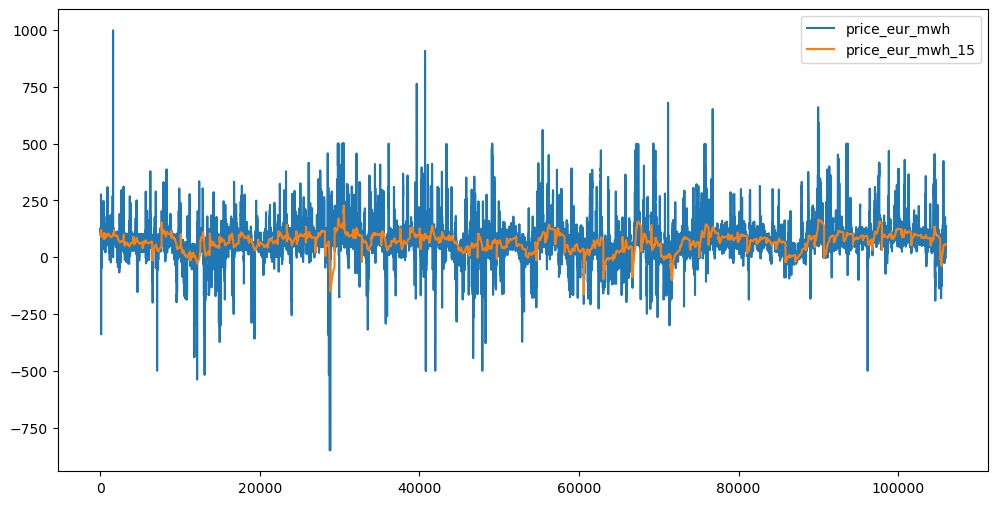

In [8]:
df2[['price_eur_mwh', 'price_eur_mwh_15']].plot(figsize=(12,6))

In [9]:
merged = pd.merge(df1, df3, on='datetime_utc', how='outer', suffixes=('_dam', '_actual'))

In [10]:
merged.head()

,datetime_utc,date_dam,hour_dam,minute_dam,price_eur_mwh_dam,date_actual,hour_actual,minute_actual,price_eur_mwh_actual
0,2023-12-31 23:00:00,2023-12-31,23.0,0.0,0.10,NaN,NaN,NaN,NaN
1,2023-12-31 23:15:00,2023-12-31,23.0,15.0,0.10,NaN,NaN,NaN,NaN
2,2023-12-31 23:30:00,2023-12-31,23.0,30.0,0.10,NaN,NaN,NaN,NaN
3,2023-12-31 23:45:00,2023-12-31,23.0,45.0,0.10,NaN,NaN,NaN,NaN
4,2024-01-01 00:00:00,2024-01-01,0.0,0.0,0.01,NaN,NaN,NaN,NaN


In [11]:
corr = merged[['price_eur_mwh_dam', 'price_eur_mwh_actual']].corr()
corr

,price_eur_mwh_dam,price_eur_mwh_actual
price_eur_mwh_dam,1.00000,0.27819
price_eur_mwh_actual,0.27819,1.00000


In [12]:
merged2 = pd.merge(df2, df3, on='datetime_utc', how='outer', suffixes=('_forecast', '_actual'))

In [13]:
corr = merged2[['price_eur_mwh_15', 'price_eur_mwh_actual']].corr()
corr

,price_eur_mwh_15,price_eur_mwh_actual
price_eur_mwh_15,1.000000,0.400361
price_eur_mwh_actual,0.400361,1.000000


Some positive correlation, first dataset with 0.217, second dataset with 0.4

In [25]:
data = merged[['price_eur_mwh_dam', 'price_eur_mwh_actual']].dropna()

mae = mean_absolute_error(data['price_eur_mwh_actual'], data['price_eur_mwh_dam'])
rmse = root_mean_squared_error(data['price_eur_mwh_actual'], data['price_eur_mwh_dam'])
mape = (abs((data['price_eur_mwh_actual'] - data['price_eur_mwh_dam']) / data['price_eur_mwh_actual']).mean()) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 93.67
RMSE: 154.97


In [26]:
data = merged2[['price_eur_mwh_actual', 'price_eur_mwh_15']].dropna()

mae = mean_absolute_error(data['price_eur_mwh_actual'], data['price_eur_mwh_15'])
rmse = root_mean_squared_error(data['price_eur_mwh_actual'], data['price_eur_mwh_15'])
mape = (abs((data['price_eur_mwh_actual'] - data['price_eur_mwh_15']) / data['price_eur_mwh_actual']).mean()) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 46.42
RMSE: 77.64


Other two datasets